Carlos Lopez

CS-577: Matplotlib / Seaborn Data Visualization

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

In [3]:
#define the working directory
path = "/Users/carlos_lopez/CS-577/"
os.chdir(path)
print(os.getcwd())

/Users/carlos_lopez/CS-577


### Part I: 3 plots for babynames dataset

In [5]:
#load babynames data by concatenating each state file in namesbystate folder

folder_path = "data/namesbystate/"
txt_files = glob.glob(os.path.join(folder_path, "*.TXT"))

df_list = []
for f in txt_files:
    state = os.path.basename(f).split('.')[0]
    df = pd.read_csv(f, header=None, names=["Sex", "Year", "Name", "Count"])
    df.insert(0, "State", state)
    df_list.append(df)
    
babynames = pd.concat(df_list, ignore_index=True)

babynames.head()

,State,Sex,Year,Name,Count
0,IN,F,1910,Mary,619
1,IN,F,1910,Helen,324
2,IN,F,1910,Ruth,238
3,IN,F,1910,Dorothy,215
4,IN,F,1910,Mildred,200


In [6]:
babynames.tail()

,State,Sex,Year,Name,Count
6504156,DE,M,2023,Tristan,5
6504157,DE,M,2023,Victor,5
6504158,DE,M,2023,Walker,5
6504159,DE,M,2023,Zayden,5
6504160,DE,M,2023,Zayne,5


In [7]:
# visualize count of babynames by year
countNamesByYear = babynames[["Year", "Count"]].groupby("Year").agg(sum)
countNamesByYear.head()

,Count
Year,
1910,516311
1911,565824
1912,888003
1913,1028578
1914,1293349


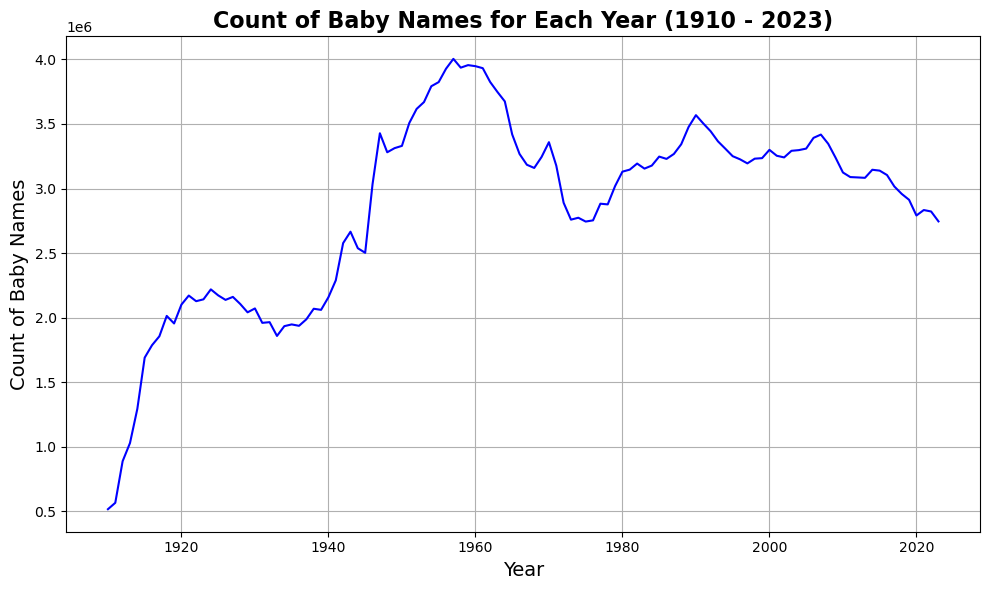

In [8]:
plt.figure(figsize=(10,6))

plt.plot(countNamesByYear.index, countNamesByYear["Count"], color="blue")

plt.xlabel('Year', size = 14)
plt.ylabel('Count of Baby Names', size = 14)
plt.title("Count of Baby Names for Each Year (1910 - 2023)", 
          size = 16, fontweight="bold")

plt.grid()
plt.tight_layout()
plt.show()

In [9]:
carlos_count = babynames[babynames["Name"] == "Carlos"]
carlos_count = carlos_count[carlos_count["Year"] == 2003]
carlos_count.head()

,State,Sex,Year,Name,Count
129226,IN,M,2003,Carlos,60
362524,IL,M,2003,Carlos,261
481612,KS,M,2003,Carlos,59
604913,SC,M,2003,Carlos,40
671558,HI,M,2003,Carlos,6


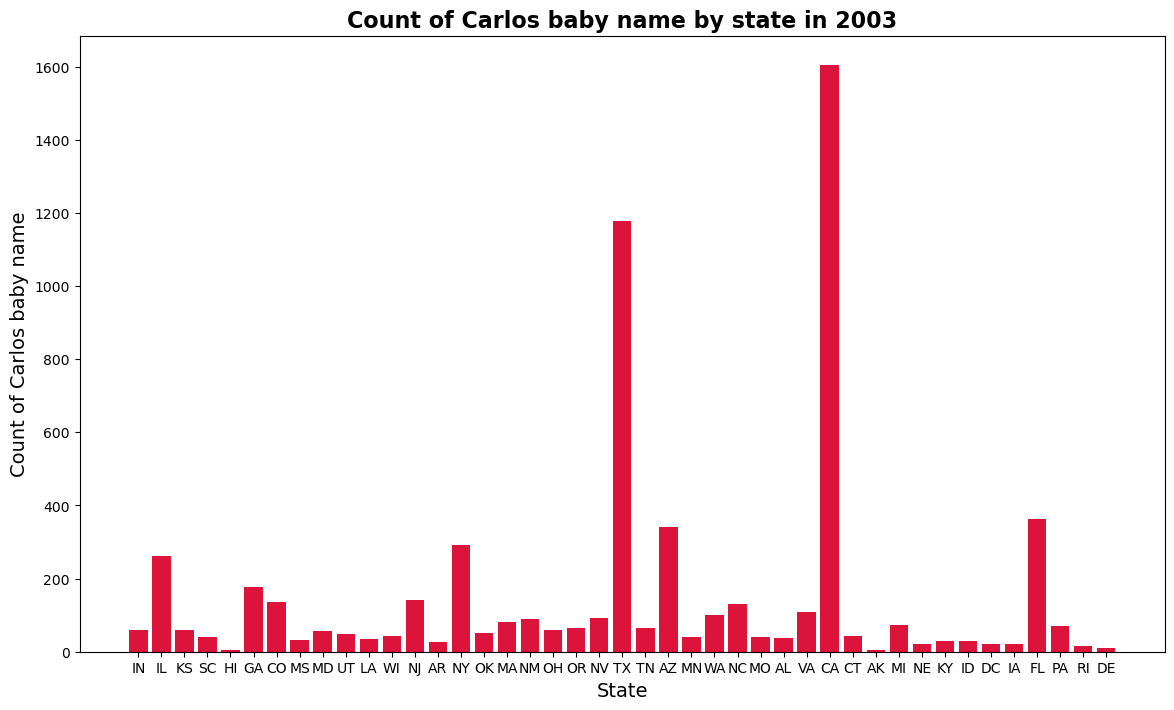

In [10]:
plt.figure(figsize=(14,8))

plt.bar(carlos_count["State"], carlos_count["Count"], color='crimson')
plt.xlabel('State', size = 14)
plt.ylabel('Count of Carlos baby name', size = 14)
plt.title("Count of Carlos baby name by state in 2003", 
          size = 16, fontweight="bold")
plt.show()

In [11]:
babynameBySex = babynames["Sex"].value_counts()
babynameBySex

F    3612034
M    2892127
Name: Sex, dtype: int64

In [12]:
babynameBySex.index

Index(['F', 'M'], dtype='object')

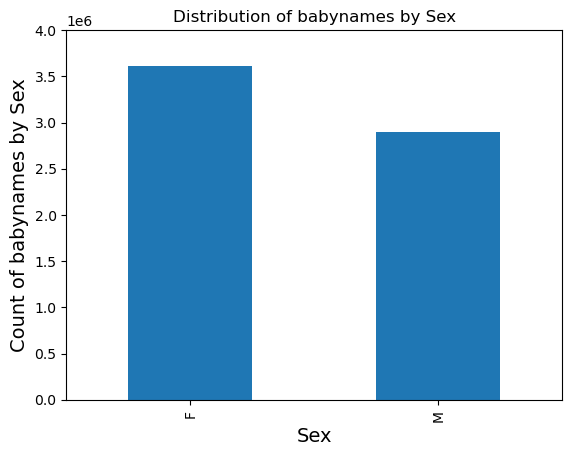

In [13]:
#plt.hist(babynameBySex.index, bins=20, density=True)
babynameBySex.plot(kind='bar', title='Distribution of babynames by Sex')
plt.ylim(0, 4000000)
plt.xlabel('Sex', size = 14)
plt.ylabel('Count of babynames by Sex', size = 14)
plt.show()

### Part II: 3 plots for elections dataset

In [15]:
#loading the elections dataset from a file path to pandas dataframe
file_path = "data/elections.csv"
elections = pd.read_csv(file_path)
elections.head()

,Year,Candidate,Party,Popular vote,Result,%
0,1788,George Washington,Independent,NaN,win,100.0
1,1788,John Adams,Federalist,NaN,loss,NaN
2,1792,George Washington,Independent,NaN,win,100.0
3,1792,John Adams,Federalist,NaN,loss,NaN
4,1796,John Adams,Federalist,NaN,win,53.4


In [16]:
polParties = elections.groupby("Party").groups
parties = []
countParties = []
for key, val in polParties.items():
    temp = sum(val)
    print(f"Party: {key}, Count: {temp}")
    parties.append(key)
    countParties.append(temp)

Party: Democratic, Count: 1087
Party: Democratic-Republican, Count: 108
Party: Federalist, Count: 63
Party: Green, Count: 136
Party: Independent, Count: 19
Party: Liberal Republican, Count: 42
Party: Libertarian, Count: 71
Party: National Republican, Count: 21
Party: National Union, Count: 37
Party: Progressive, Count: 61
Party: Republican, Count: 883
Party: Southern Democratic, Count: 35
Party: Whig, Count: 138


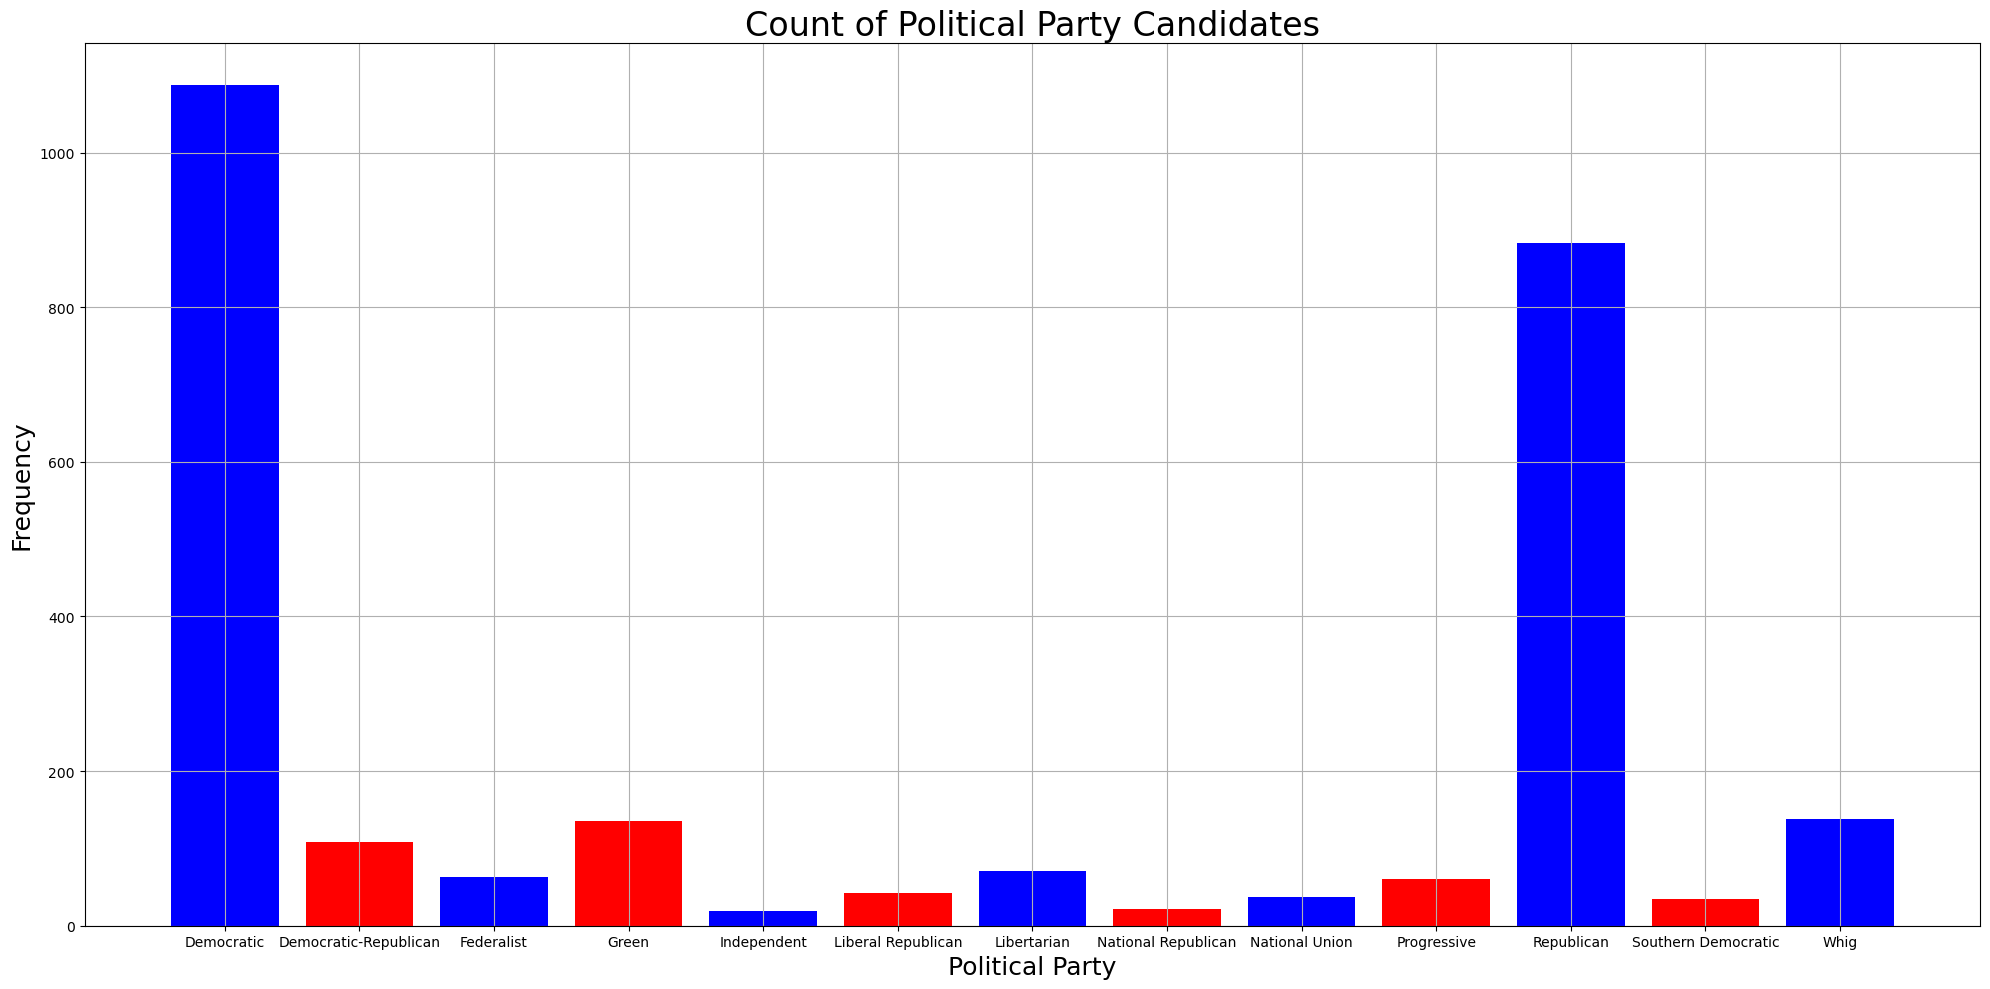

In [17]:
plt.figure(figsize=(20,10))
plt.bar(parties, countParties, color=["blue", "red"])
plt.title("Count of Political Party Candidates", size=24)
plt.xlabel("Political Party", size=18)
plt.ylabel("Frequency", size=18)
plt.tight_layout()
plt.grid()
plt.show()

In [18]:
electionWinners = elections[elections["Result"] == "win"]
electionWinners = electionWinners.groupby("Year").first()
electionWinners = electionWinners.iloc[:-2]
electionWinners

,Candidate,Party,Popular vote,Result,%
Year,,,,,
1788,George Washington,Independent,NaN,win,100.000000
1792,George Washington,Independent,NaN,win,100.000000
1796,John Adams,Federalist,NaN,win,53.400000
1800,Thomas Jefferson,Democratic-Republican,NaN,win,61.400000
1804,Thomas Jefferson,Democratic-Republican,NaN,win,72.800000
1808,James Madison,Democratic-Republican,NaN,win,64.700000
1812,James Madison,Democratic-Republican,NaN,win,50.400000
1816,James Monroe,Democratic-Republican,NaN,win,80.600000
1820,James Monroe,Democratic-Republican,NaN,win,100.000000


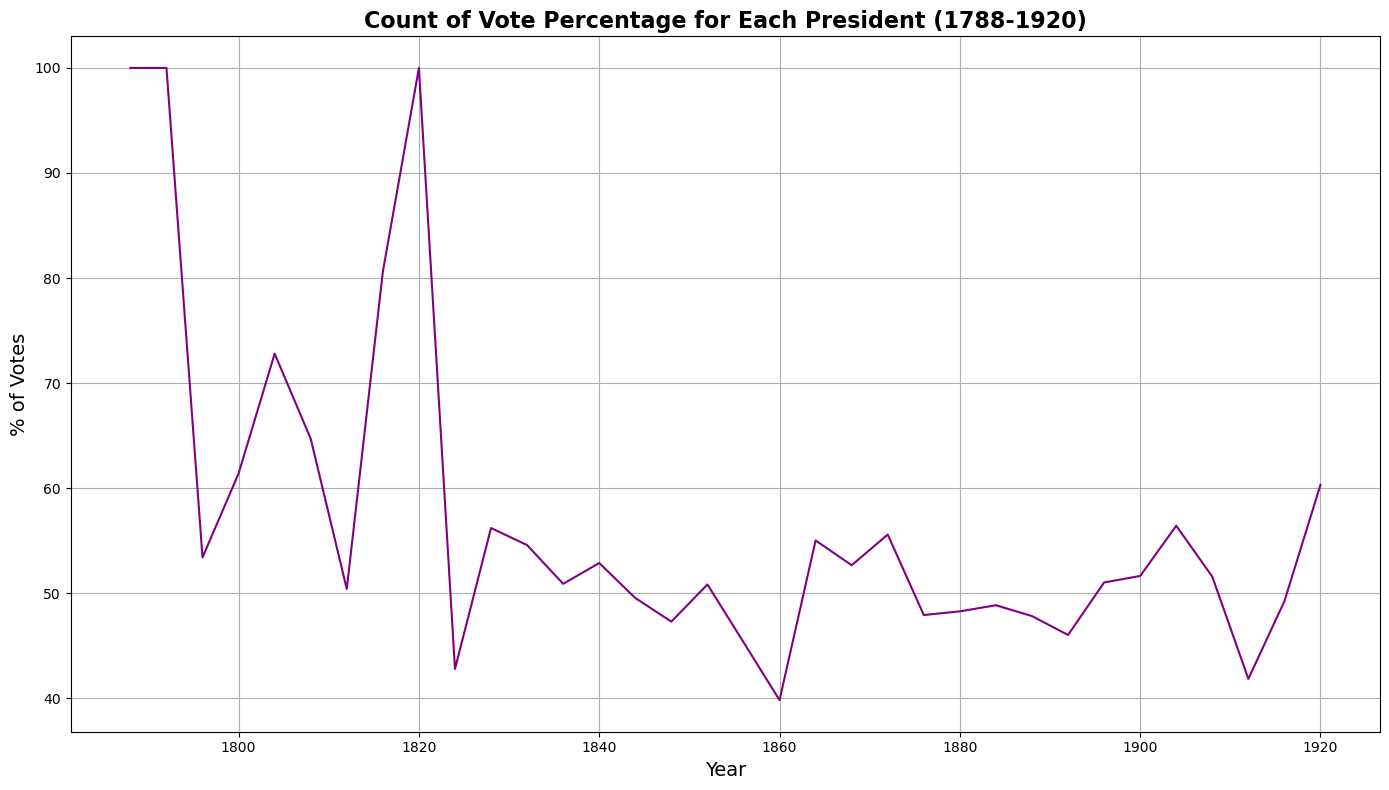

In [19]:
#plot of winner's popular vote over time

plt.figure(figsize=(14,8))

plt.plot(electionWinners.index, electionWinners["%"], color="purple")

plt.xlabel('Year', size = 14)
plt.ylabel('% of Votes', size = 14)
plt.title("Count of Vote Percentage for Each President (1788-1920)", 
          size = 16, fontweight="bold")

plt.grid()
plt.tight_layout()
plt.show()

In [20]:
winParties = electionWinners.groupby("Party").groups
parties = []
countParties = []
for key, val in polParties.items():
    temp = len(val)
    print(f"Party: {key}, Count: {temp}")
    parties.append(key)
    countParties.append(temp)

Party: Democratic, Count: 24
Party: Democratic-Republican, Count: 9
Party: Federalist, Count: 8
Party: Green, Count: 2
Party: Independent, Count: 3
Party: Liberal Republican, Count: 1
Party: Libertarian, Count: 1
Party: National Republican, Count: 1
Party: National Union, Count: 1
Party: Progressive, Count: 1
Party: Republican, Count: 17
Party: Southern Democratic, Count: 1
Party: Whig, Count: 5


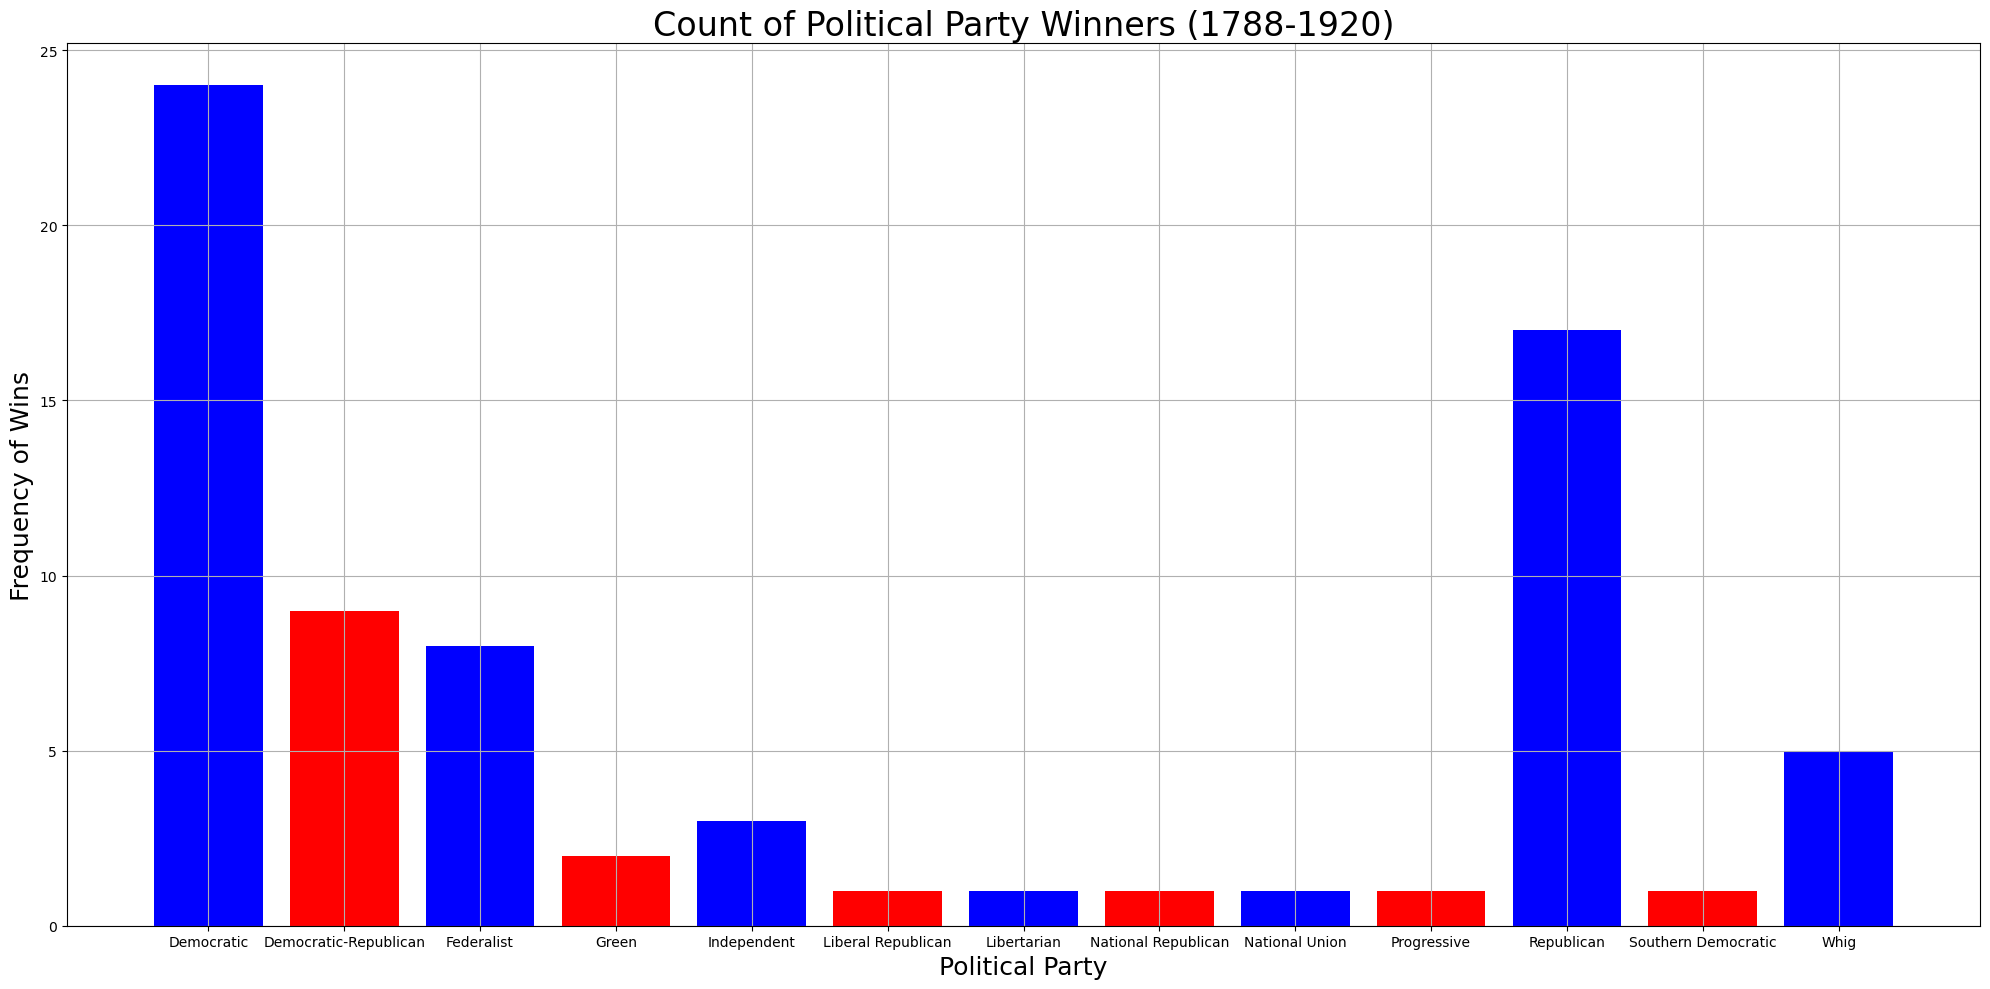

In [21]:
plt.figure(figsize=(20,10))
plt.bar(parties, countParties, color=["blue", "red"])
plt.title("Count of Political Party Winners (1788-1920)", size=24)
plt.xlabel("Political Party", size=18)
plt.ylabel("Frequency of Wins", size=18)
plt.tight_layout()
plt.grid()
plt.show()